# HW-5, Алексей Менгден, MAEE'19

In [1]:
import requests
import re
import zipfile
import pandas as pd
import matplotlib
import os
import numpy as np
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
url = 'https://drive.google.com/uc?export= download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
response = requests.get(url) 
filename = re.findall("filename=\"(.*?\.zip)", response.headers['content-disposition'])[0]
path = os.path.join(os.getcwd(), '')
if not os.path.isfile(path + filename):
        with open(path + filename, "wb") as file:
            file.write(response.content)
zf = zipfile.ZipFile(path + filename)
data = pd.read_csv(zf.open('survey_results_public.csv'))
schema = pd.read_csv(zf.open('survey_results_schema.csv'))

# I

## 1

Сколько вопросов было в опросе? 

In [3]:
schema.shape[0]

154

Сколько разработчиков приняло участие в нем?

In [4]:
data['Respondent'].unique().shape[0]

51392

## 2

Нарисуйте карту мира с границами стран

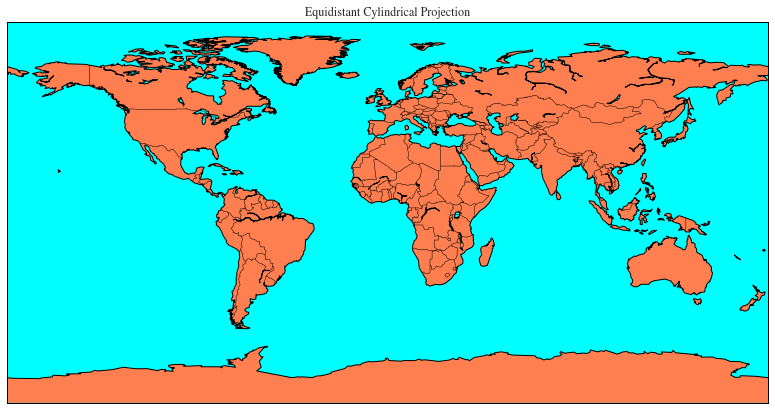

In [5]:
plt.figure(figsize=(14, 7))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
plt.show()

## 3

Нарисуйте на карте точку в центре каждой страны



In [6]:
dfcapital = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv',header=0)[0]
dfcapital.rename(columns={'name': 'Country'}, inplace=True)

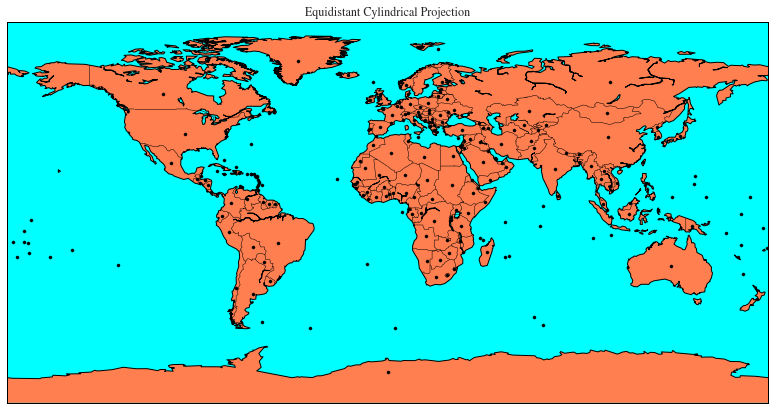

In [7]:
plt.figure(figsize=(14, 7))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
m.scatter(dfcapital['longitude'], dfcapital['latitude'], latlon = True, s = 10 , marker='o', color='k', zorder=10)
plt.show()

## 4

Объедините данные по координатам центров стран с данными опроса и вы- ведите в центре каждой страны, из которой был хотя бы один респондент, круг с площадью, пропорциональной числу участников опроса для данной страны.

In [8]:
dict = {'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
'Azerbaidjan': 'Azerbaijan',
'Brunei Darussalam': 'Brunei',
'Falkland Islands': 'Falkland Islands [Islas Malvinas]',
'Heard and McDonald Islands': 'Heard Island and McDonald Islands',
'Slovak Republic': 'Slovakia',
'Tadjikistan': 'Tajikistan',
'Vatican City State': 'Vatican City',
'Virgin Islands (British)': 'British Virgin Islands',
'Virgin Islands (USA)': 'U.S. Virgin Islands',
'Russian Federation': 'Russia',
'Polynesia (French)': 'French Polynesia',
'Pitcairn Island': 'Pitcairn Islands',
'Saint Vincent & Grenadines': 'Saint Vincent and the Grenadines',
'Reunion (French)': 'Réunion',
'Ivory Coast (Cote D\'Ivoire)': 'Côte d\'Ivoire',
'Zaire': 'Congo [DRC]',
'Macedonia': 'Macedonia [FYROM]',
'Martinique (French)': 'Martinique',
'Myanmar': 'Myanmar [Burma]',
'New Caledonia (French)': 'New Caledonia',
'S. Georgia & S. Sandwich Isls.':
'South Georgia and the South Sandwich Islands',
'Moldavia': 'Moldova',
'French Guyana': 'French Guiana',
}

In [9]:
data["Country"].replace(dict, inplace = True)
a = pd.DataFrame(data.groupby('Country')['Country'].agg(len).sort_values())
a.rename(columns={'Country': 'Count'}, inplace=True)
a['Country'] = a.index
final = pd.merge(a, dfcapital, on='Country', how='outer')
final.fillna(value=0, inplace=True)

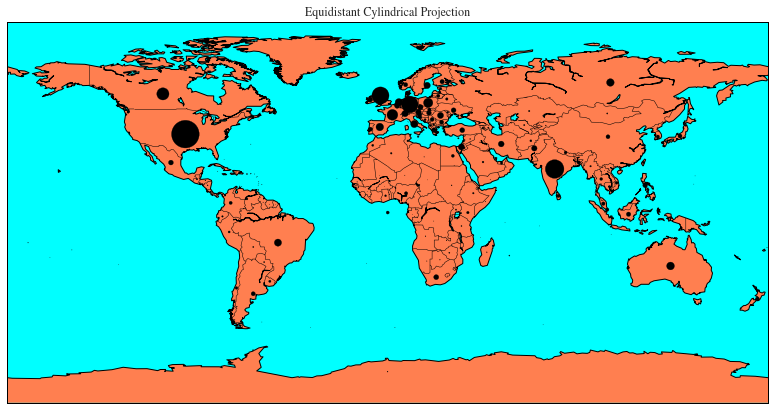

In [10]:
plt.figure(figsize=(14, 7))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
m.scatter(final['longitude'], final['latitude'], final['Count']/15, marker='o', color='k', zorder=10)
plt.show()

Отдельно для Европы

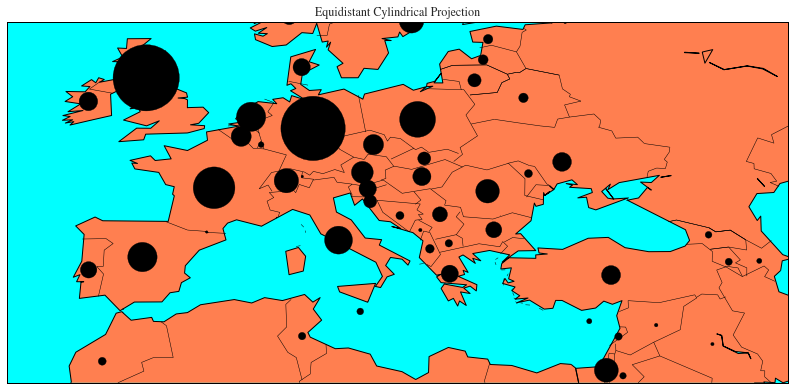

In [11]:
plt.figure(figsize=(14, 7))
m = Basemap(projection='cyl', llcrnrlat=30, urcrnrlat=60, llcrnrlon=-15, urcrnrlon=50, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection")
m.scatter(final['longitude'], final['latitude'], final['Count'], marker='o', color='k', zorder=10)
plt.show()

# II

## 1

Загрузите эти два файла в два pandas.DataFrame()

In [12]:
filename = 'railways.zip'
path = os.path.join(os.getcwd(), '')
if not os.path.isfile(path + filename):
        with open(path + filename, "wb") as file:
            file.write(response.content)
zf = zipfile.ZipFile(path + filename)
railways = pd.read_csv(zf.open('railways201208.csv'))
stations = pd.read_csv(zf.open('stations.csv'))

In [13]:
railways.head()

,date_priem,fr_code,sto_code,stn_code,dist,weight,amount,taxsum,commodity
0,31.08.2012,1100,61400,3010,1944,202150,139005.0,25020.9000,8
1,01.08.2012,1100,61360,59250,431,265500,66608.0,11989.4400,8
2,29.08.2012,1100,81530,60530,1443,134700,74336.0,13380.4800,8
3,03.08.2012,1100,62630,1030,2150,67500,51431.0,9257.5801,8
4,02.08.2012,1100,62710,53850,1402,579150,326169.0,58710.4220,8


In [14]:
stations.head()

,stshortname,stname,stcode,stdate1,stdate2,stroadname,stroadcode,stcountry,stcountrycode
0,ВЫБОРГ-ПЕРЕВ,ВЫБОРГ-ПЕРЕВАЛКА,2340,18.09.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
1,КАЛАШНИКОВО,КАЛАШНИКОВО,6230,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
2,ДОБЫВАЛОВО,ДОБЫВАЛОВО,5510,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
3,СРЕДНЕРОГАТС,СРЕДНЕРОГАТСКАЯ,3490,16.10.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643
4,ЛЕВАШОВО,ЛЕВАШОВО,3880,01.08.2000,01.01.3000,ОКТЯБРЬСКАЯ,1,Российская Федерация,643


## 2

Изобразите гистограмму и ядерную оценку плотности для расстояния перевозки и его логарифма

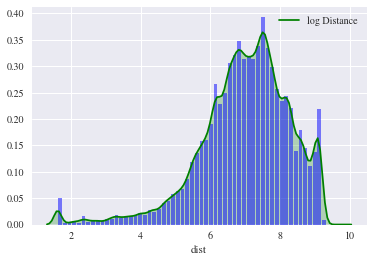

In [15]:
sns.distplot(np.log(railways['dist']),bins =60, kde_kws={"color": "g", "label": "log Distance", "shade":True},
               hist_kws={"color": "b","alpha":0.5,"rwidth":0.8})

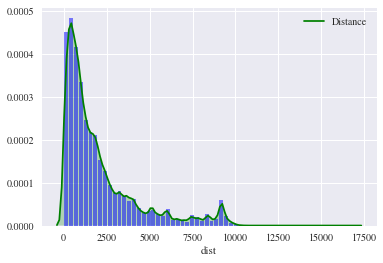

In [16]:
sns.distplot(railways['dist'], bins =60, kde_kws={"color": "g","label": "Distance", "shade":True},
               hist_kws={"color": "b", "alpha":0.5, "rwidth":0.8})

## 3

Изобразите логарифм расстояния в виде boxplot, категоризованный по типам грузов (поле commodity)

In [17]:
ticks = ['Coal', 'Oil', 'Ores','Minerals', 'Wood', 'Constructions', 'Fertilizers', 'Grains', 'Petrol', 'Other']

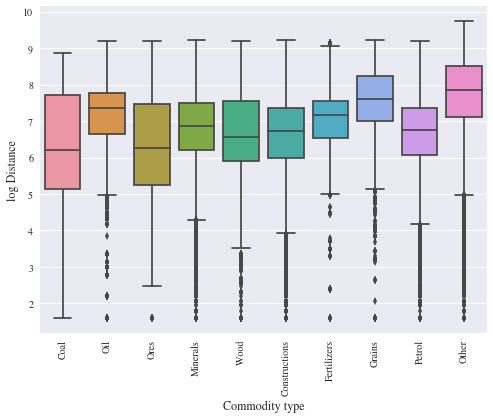

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=railways['commodity'], y=np.log(railways['dist']))
plt.xticks(rotation=90)
plt.xlabel('Commodity type', fontsize=12)
ax.set_xticklabels(ticks)
plt.ylabel('log Distance', fontsize=12)
plt.show()
fig.savefig('pic3.pdf')

## 4

Для каждого типа грузов вычислите медиану массы перевозимого груза и изобразите violinplot с распределениями расстояния перевозки, классифицированный по типам грузов, в котором слева и справа были бы распределения грузов относительно небольшой и большой массы соответственно

In [19]:
median = pd.DataFrame(railways.groupby(['fr_code'])['weight'].agg('median'))
median.rename(columns={'weight':'median_weight'},inplace=True)
median['fr_code'] = median.index
final = pd.merge(railways, median, on='fr_code', how='outer')
final['Weight'] = np.where(final['weight']<final['median_weight'], 'Light', 'Heavy')

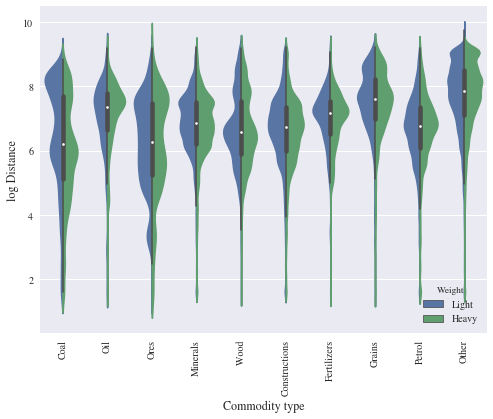

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=final['commodity'], y=np.log(final['dist']),
               hue=final['Weight'], split=True,
               linewidth=1.5)
plt.xticks(rotation=90)
plt.xlabel('Commodity type', fontsize=12)
ax.set_xticklabels(ticks)
plt.ylabel('log Distance', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## 5

 Изобразите диаграмму рассеивания (scatterplot), для которой по горизонтали будет логарифм произведения расстояния на массу груза, а по вертикали логарифм провозной платы

Набюдений для которых проездная плата равна 0 всего 23 и их можно отбросить

In [21]:
len(final[final['amount']==0])/len(final)

8.931830714624125e-05

In [22]:
finaldrop0 = final[final['amount']!=0]
sample = finaldrop0.ix[np.random.choice(finaldrop0.index.values, 2000)]
xx = np.log(sample['weight']*sample['dist'])
yy = np.log(sample['amount'])

Для выборки из 2000 наблюдений

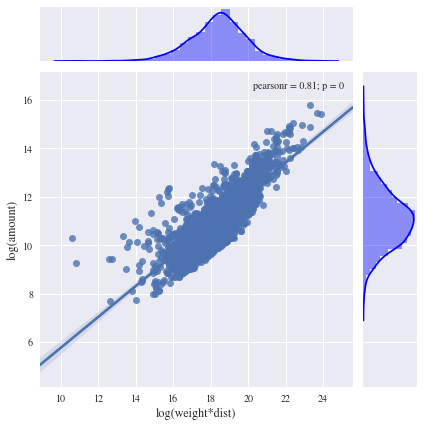

In [23]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=xx, y=yy, kind="reg", marginal_kws={"color": "b", "bins":30})
plt.xlabel('log(weight*dist)', fontsize=12)
plt.ylabel('log(amount)', fontsize=12)
plt.savefig('pic1.pdf')